<a href="https://colab.research.google.com/github/Ridhi655/Chennai-House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we are going to work on a dataset which consists information about the location of the house , price and other aspects such as square feet etc. 

When we work on these sort of data , we first need to see which column is important for us and which is not. Our aim today is to make a model which can give us a good prediction on the price of the house based on other variables. We are going to use Linear Regression and other Machine Learning algorithms  for this dataset and see which one gives us a good score based on evaluation metrics..

**IMPORT NECESSARY LIBRARIES**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**IMPORTING THE DATASET**




In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Ridhi655/Chennai-House-Price-Prediction/main/train-chennai-sale.csv')

we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**DATA CLEANING**

Checking the datatypes of all columns to know which column needs a change as required

In [5]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

Changing improper datatypes to proper one for analysis

In [6]:
#converting N_BEDROOM & N_BATHROOM to int type
df['N_BEDROOM']=df['N_BEDROOM'].fillna(0).astype(int, errors='ignore')
df['N_BATHROOM']=df['N_BATHROOM'].fillna(0).astype(int, errors='ignore')

**SUPERVISED REGRESSION PROBLEM.**

We have the "target variable(df["SALES_PRICE"])" and the type of Target variable is continuous. Since we are trying to predict a continuous value, it is a Regression problem

Printing different columns and total number of features

In [7]:
print(df.columns)
print('The total number of features:',df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')
The total number of features: 22


**Let us analyze the data.**

We can observe that PRT_ID cannot be used as a feature for predicting sales price.So we will drop the feature.

**Commision and Registration fee columns:** 

On top of all numerical columns, we are given registration fee and commission columns on which sales price doesn't depends but these two columns are completly dependant on sales column value. That means after determining the sales price ,the commission and registration fee are paid. Hence, these two columns don't directly contribute to determine the sale .So we can drop them.

**DROPPING UNWANTED FEATURES.**

In [8]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [9]:
print("Total number of features in the data after droping unnecessary features is:",df.shape[1])
pd.DataFrame(df.dtypes.value_counts())

Total number of features in the data after droping unnecessary features is: 19


,0
object,9
int64,6
float64,4


**SPLITTING THE DATA INTO CATEGORICAL AND NUMERICAL FEATURES**

In [10]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [11]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE']


In [12]:
print('The data has {} categorical features'.format(len(categorical_features)))
print('The data has {} numerical_features'.format(len(numerical_features)))

The data has 9 categorical features
The data has 10 numerical_features


**LOOKING FOR NULL VALUES IN DATA**

In [13]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

**FILLING THE NULL VALUES**

In [14]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode())  #categorical data
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode())  #categorical data
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean()) #continuous feature(mean/median)



**LOOKING FOR ANY ERROR IN CATEGORICAL DATA**

SPELLING CORRECTIONS COLUMN-WISE

In [15]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [16]:
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [17]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [18]:
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)

In [19]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [20]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)

In [21]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [22]:
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)

In [23]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [24]:
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)

In [25]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [26]:
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)

In [27]:

df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Dropping duplicates if any

In [28]:
df.drop_duplicates()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1,1,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3,2,5,Family,Yes,11-04-1995,Others,No Sewer,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2,1,4,Normal Sale,No,01-09-1978,House,No Sewer,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1,1,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   int64  
 5   N_BATHROOM     7109 non-null   int64  
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

**CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD.**





In [30]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [31]:
df['SALE_YEAR']=pd.DatetimeIndex(df['DATE_SALE']).year

In [32]:
df['SALE_YEAR']

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: SALE_YEAR, Length: 7109, dtype: int64

In [33]:
df['BUILD_YEAR']=pd.DatetimeIndex(df['DATE_BUILD']).year

In [34]:
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

**DROPPING THE FEATURES WHICH MAKE NO SENSE.**

Dropped ['DATE_SALE','DATE_BUILD'] because we have retrieved the years from those features. 

In [36]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

**Checking for outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


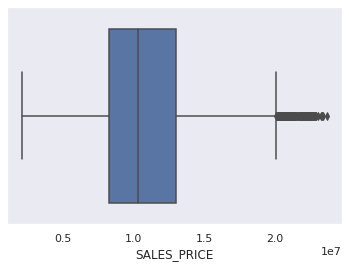

In [37]:
sns.boxplot(df['SALES_PRICE'])

**EXPLORATORY DATA ANALYSIS**

**Which is the most common house (room wise) ?**


Let’s see which is most common room number. 

You may wonder why is it important ? 

Let’s look at this problem from a builder’s perspective, sometimes it’s important for a builder to see which is the highest selling house type which enables the builder to make house based on that. Here in India , for a good locality ,a builder opts to make houses which are more than 3 bedrooms which attracts the higher middle class and upper class section of the society.



Let’s see how this pans out for the given data ?

Text(0, 0.5, 'Count')

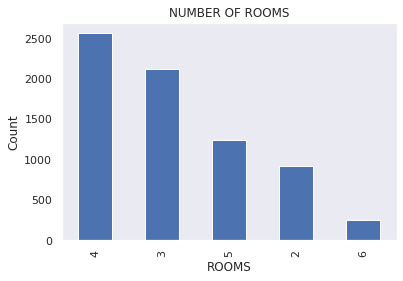

In [38]:
df['N_ROOM'].value_counts().plot(kind='bar')
plt.title('NUMBER OF ROOMS')
plt.xlabel('ROOMS')
plt.ylabel('Count')


As we can see from the visualization 4 room houses are most commonly sold followed by 3 room. 

So how is it useful ?

 For a builder having this data , He can make a new building with more 4 and 3 bedroom’s to attract more buyers.

So now we know that 3 and 4 bedroom’s are highest selling. But at which area ?

**DATA VISUALISATION**

**Distribution Of Features in Data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

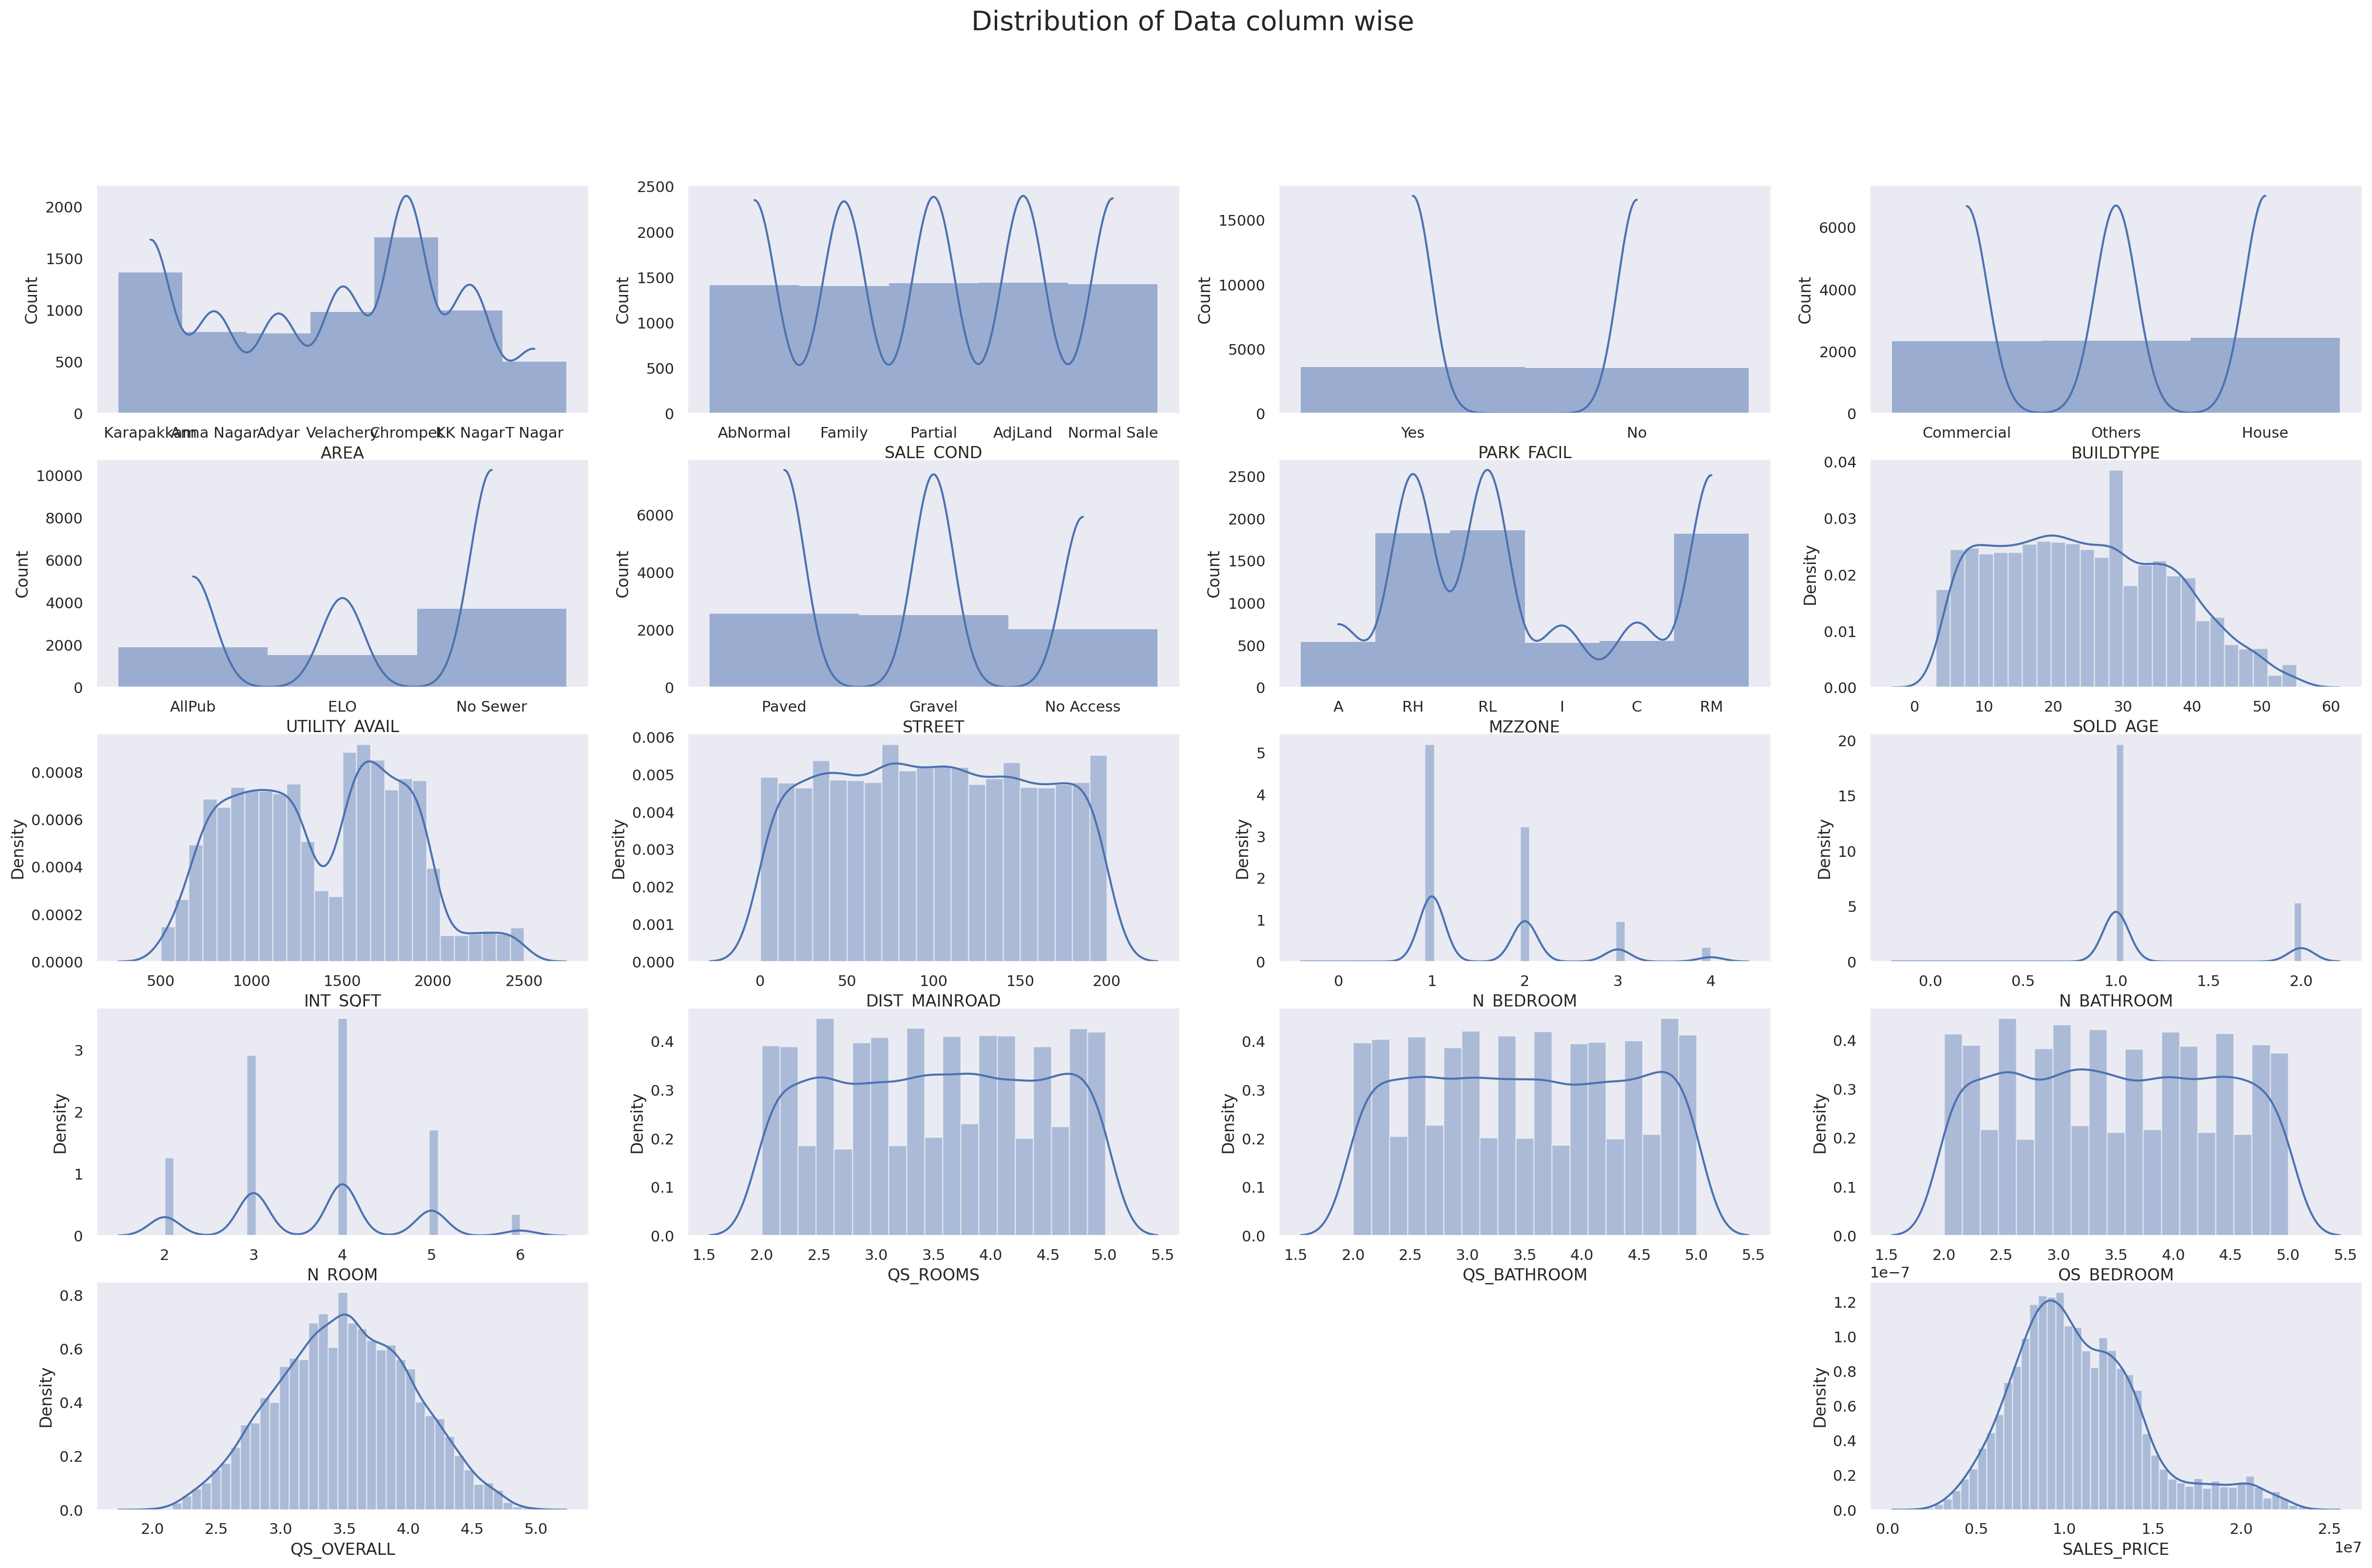

In [39]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.STREET, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(df.SOLD_AGE)

plt.subplot(5,4,9)
sns.distplot(df.INT_SQFT)

plt.subplot(5,4,10)
sns.distplot(df.DIST_MAINROAD)

plt.subplot(5,4,11)
sns.distplot(df.N_BEDROOM)

plt.subplot(5,4,12)
sns.distplot(df.N_BATHROOM)

plt.subplot(5,4,13)
sns.distplot(df.N_ROOM)

plt.subplot(5,4,14)
sns.distplot(df.QS_ROOMS)

plt.subplot(5,4,15)
sns.distplot(df.QS_BATHROOM)

plt.subplot(5,4,16)
sns.distplot(df.QS_BEDROOM)

plt.subplot(5,4,17)
sns.distplot(df.QS_OVERALL)

plt.subplot(5,4,20)
sns.distplot(df.SALES_PRICE)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

In [40]:

A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

In [41]:
print('A=',A)
print()
print('B=',B)
print()
print('C=',C)
print()
print('D=',D)
print()
print('E=',E)
print()
print('F=',F)
print()

A= AREA
Adyar          774
Anna Nagar     788
Chrompet      1702
KK Nagar       997
Karapakkam    1366
T Nagar        501
Velachery      981
Name: AREA, dtype: int64

B= BUILDTYPE
Commercial    2329
House         2444
Others        2336
Name: AREA, dtype: int64

C= UTILITY_AVAIL
AllPub      1887
ELO         1522
No Sewer    3700
Name: AREA, dtype: int64

D= STREET
Gravel       2520
No Access    2017
Paved        2572
Name: AREA, dtype: int64

E= MZZONE
A      537
C      550
I      525
RH    1822
RL    1858
RM    1817
Name: AREA, dtype: int64

F= PARK_FACIL
No     3522
Yes    3587
Name: AREA, dtype: int64



**DISTRIBUTION OF THE DATA**

**AREA** - Number of building in "Chrompet" is higher than other areas. "T Nagar" has lowest number of building when compared with other areas.

**BUILDTYPE** - Number of "House" building type is higher than "Commercial" and "Other" building type.

**UTILITY_AVAILABLE** - "NoSewer" building is higher than "ALLPUB" and "ELO" building.

**STREET**- There are more 'Paved' streets than gravel or No access.

**MZZONE** - Residential Low density i.e.,RL is the highest.



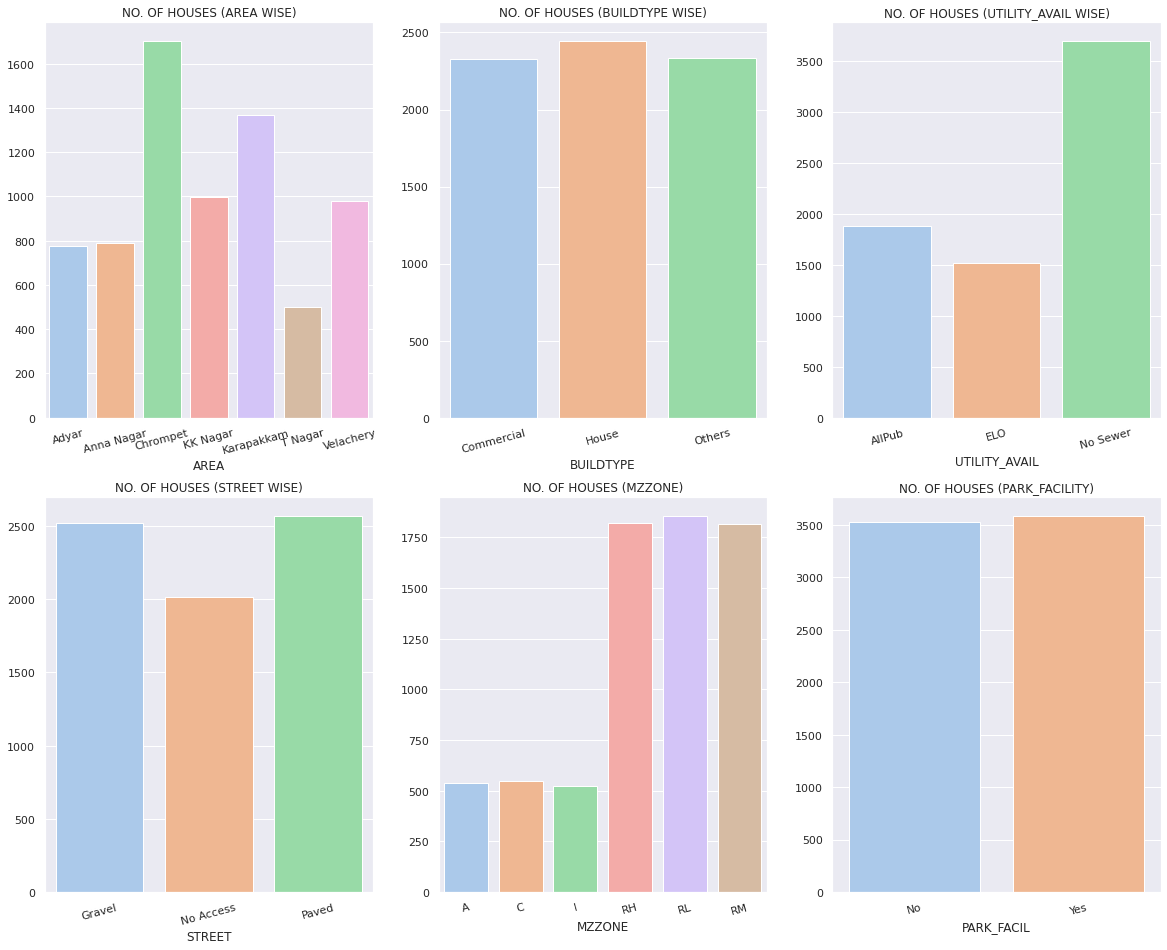

In [42]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

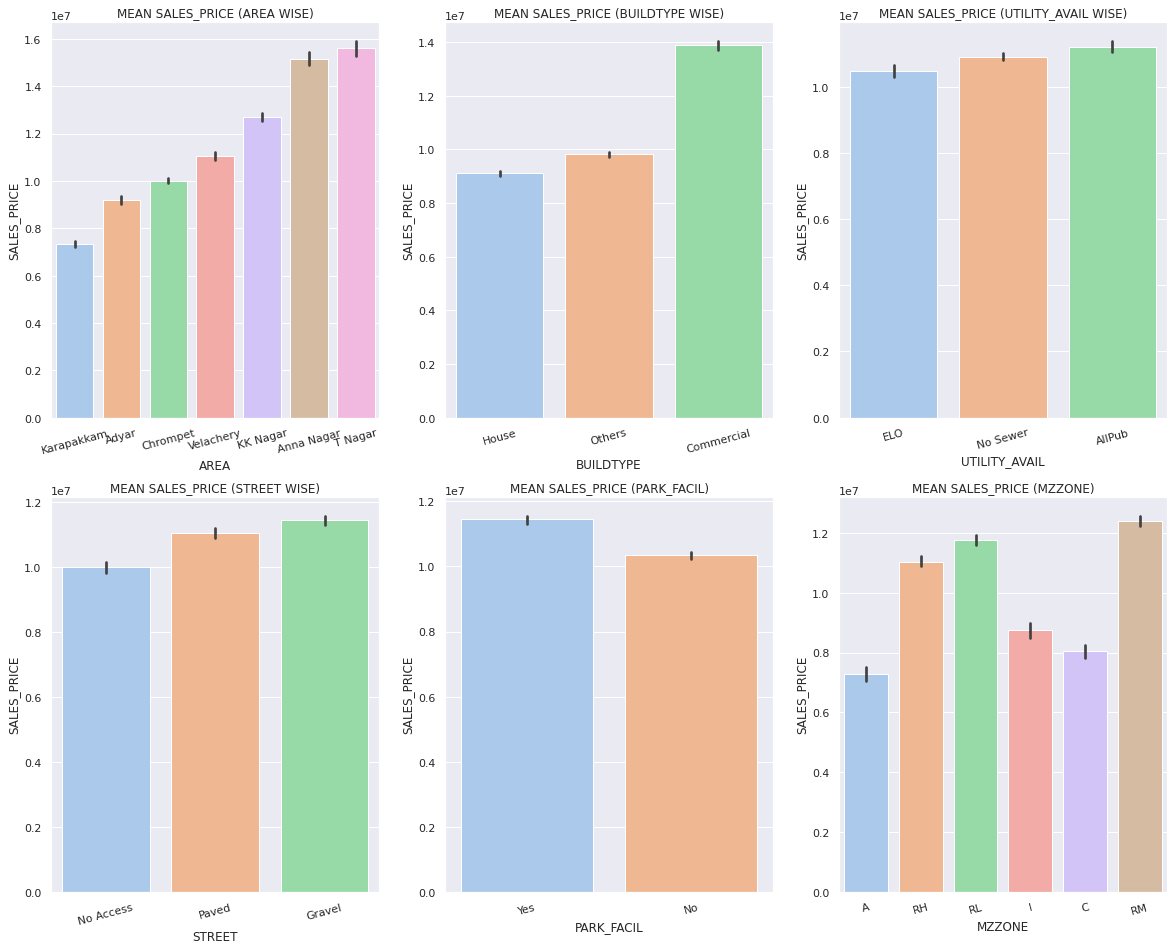

In [43]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [44]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR', 'SOLD_AGE'],
      dtype='object')

**How common factors are affecting the price of the houses ?**


We saw the common areas and now we’re going to see few common factors affecting the prices of the house and if so ? then by how much ?



Let us start with , If sales price is getting affected by area of the house or not ?

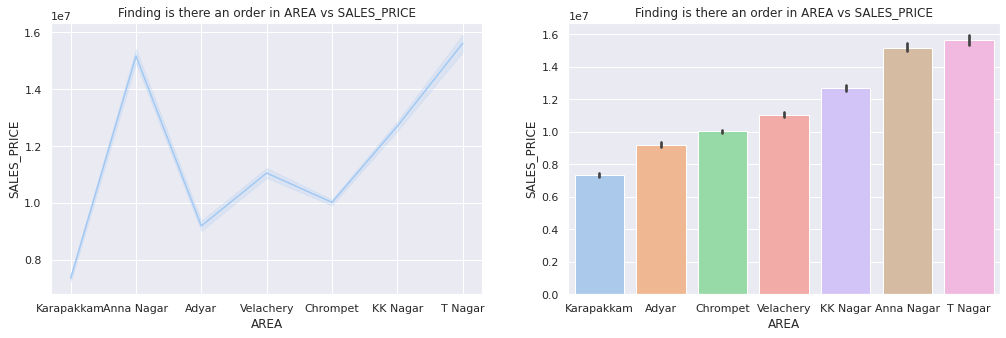

In [45]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
#area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that area has a linear relation with our target variable i.e., Sales price .So,for encoding of data, we will make use of label encoding.

If sales price is getting affected by sale_condition of the house or not ?

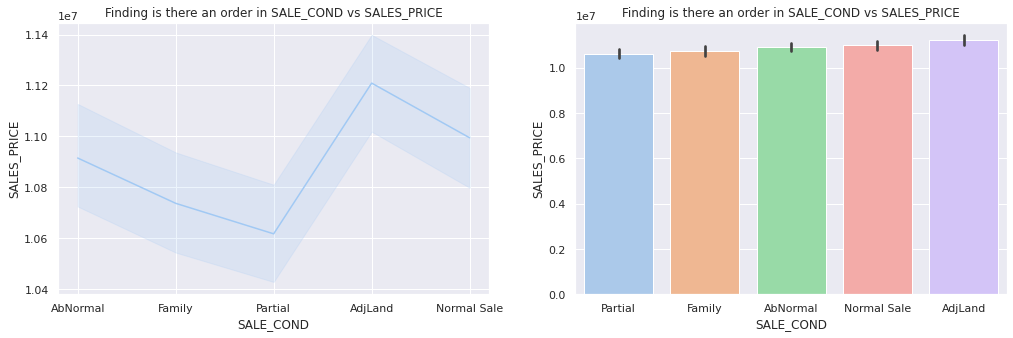

In [46]:

plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['SALE_COND'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in SALE_COND vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('Finding is there an order in SALE_COND vs SALES_PRICE')
plt.show()

**Interpretation:**

As it can be observed that with change in sale condition, there is not much change in feature.So we can drop this feature.

If sales price is getting affected by build_type of the house or not ?

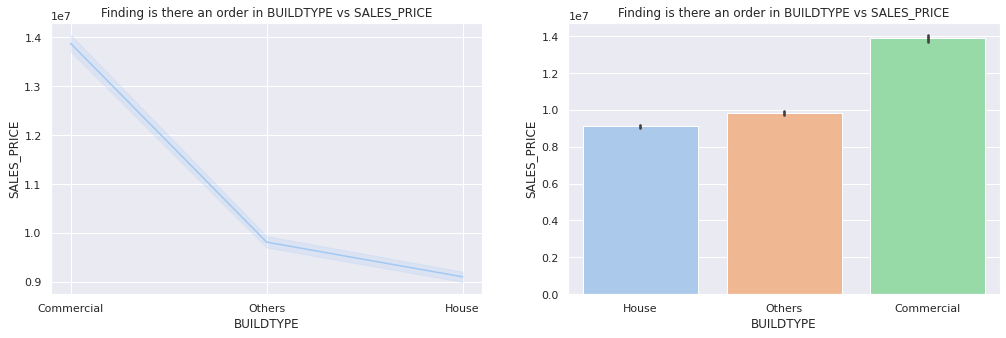

In [47]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that build_type doesn't have a linear relation with our target variable i.e., Sales price .So,for encoding of data, we will make use of one-hot encoding.

 If sales price is getting affected by utility available of the house or not ?

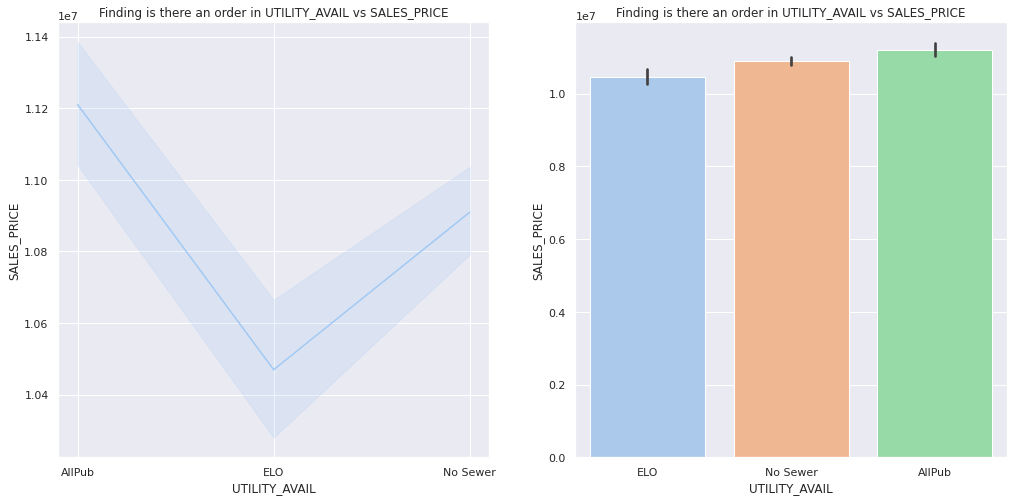

In [48]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that utility available does have a linear relation with our target variable i.e., Sales price .So,for encoding of data, we will make use of label encoding.

 If sales price is getting affected by MZZONE of the house or not ?

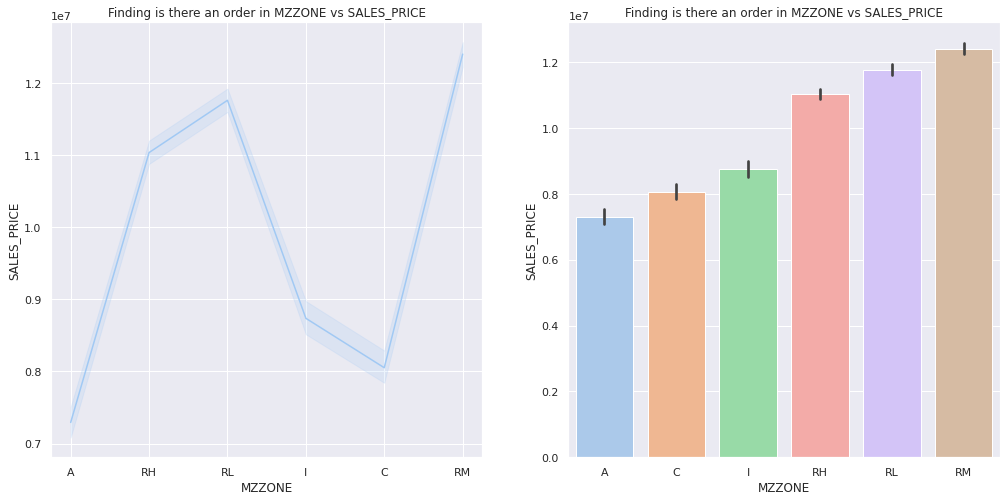

In [49]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that mzzone has a piece-wise linear relation with our target variable i.e., Sales price i.e.,there is a slight jump from MZZONE I to MZZONE RH.So,for encoding of data, we will make use of label encoding.

If sales price is getting affected by street of the house or not ?

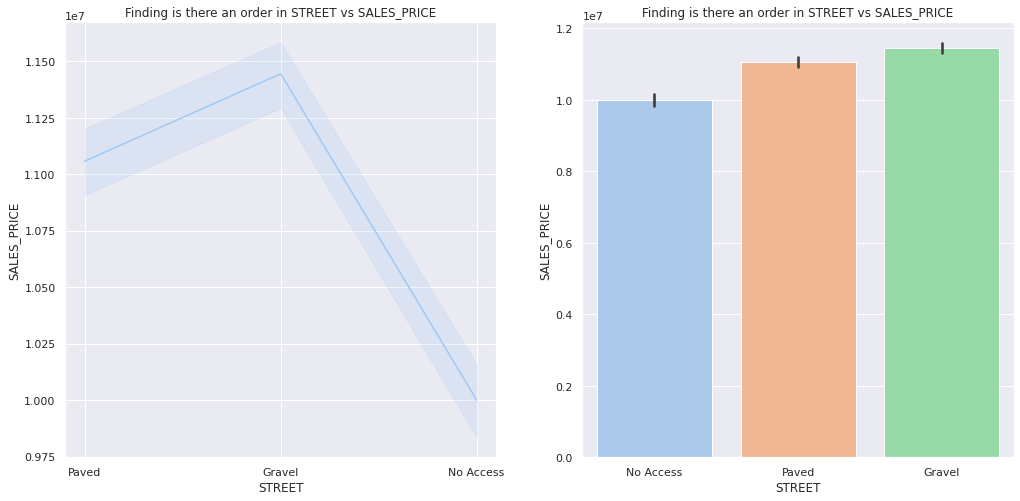

In [50]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['STREET'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in STREET vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('Finding is there an order in STREET vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that street has a slight linear relation with our target variable i.e., Sales price .So,for encoding of data, we will make use of label encoding.

 If sales price is getting affected by park facility or not ?

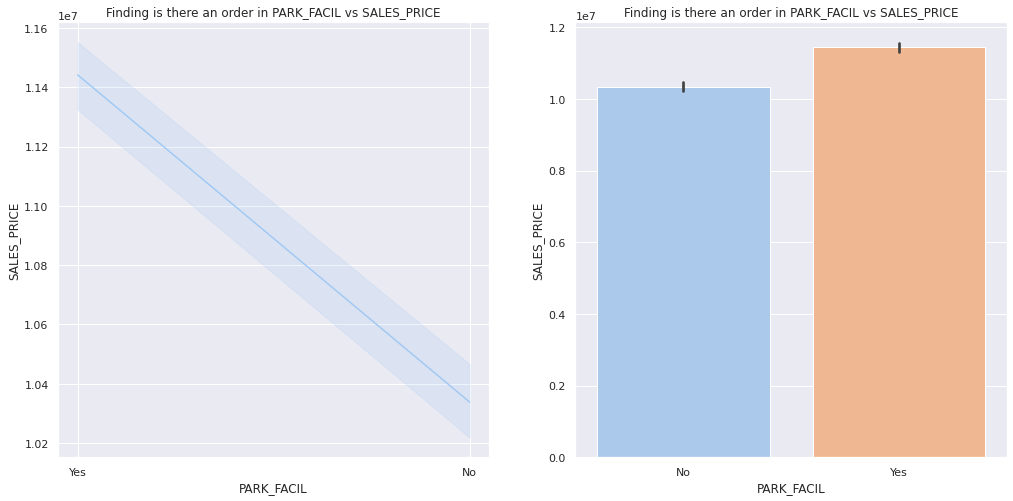

In [51]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in PARK_FACIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('Finding is there an order in PARK_FACIL vs SALES_PRICE')
plt.show()

**Interpretation:**

It can be observed from the above graph that park-facility has a linear relation with our target variable i.e., Sales price .So,for encoding of data, we will make use of label encoding.

**Here we can come to conclusion that:** 

In area, when we sort column in respect of sales_price, we find good  linear ordinal relation in this categorical feature and it will be important for us, so we will keep it and do label encoding by preserving the order. 

In sale_cond, when we sort column in respect of sales_price, we find good linear ordinal relation in this categorical feature and it will be important for us, so we will keep it and do label encoding by preserving the order. 

In mzzone, when we sort column in respect of sales_price, we find good linear ordinal relation in this categorical feature and it will be important for us ,so we will keep it and do label encoding by preserving the order. 

In utility_avail, when we sort column in respect of sales_price, we find good linear ordinal relation in this categorical feature and it will be important for us, so we will keep it and do label encoding by preserving the order. 

In buildtype, when we sort column in respect of sales_price, we didn't find linear relation in this categorical feature but it may be important for us, so we will keep it and do OneHotEncoding on this column data. 

In street, when we sort column in respect of sales_price, we find good linear ordinal relation in this categorical feature and it will be important for us, so we will keep it and do label encoding by preserving the order. 

In park_facil, when we sort column in respect of sales_price, we find good linear ordinal relation in this categorical feature and it will be important for us, so we will keep it and do label encoding by preserving the order. 

**PLOTTING OF NUMERICAL DATA VS SALES PRICE(TARGET VARIABLE)**

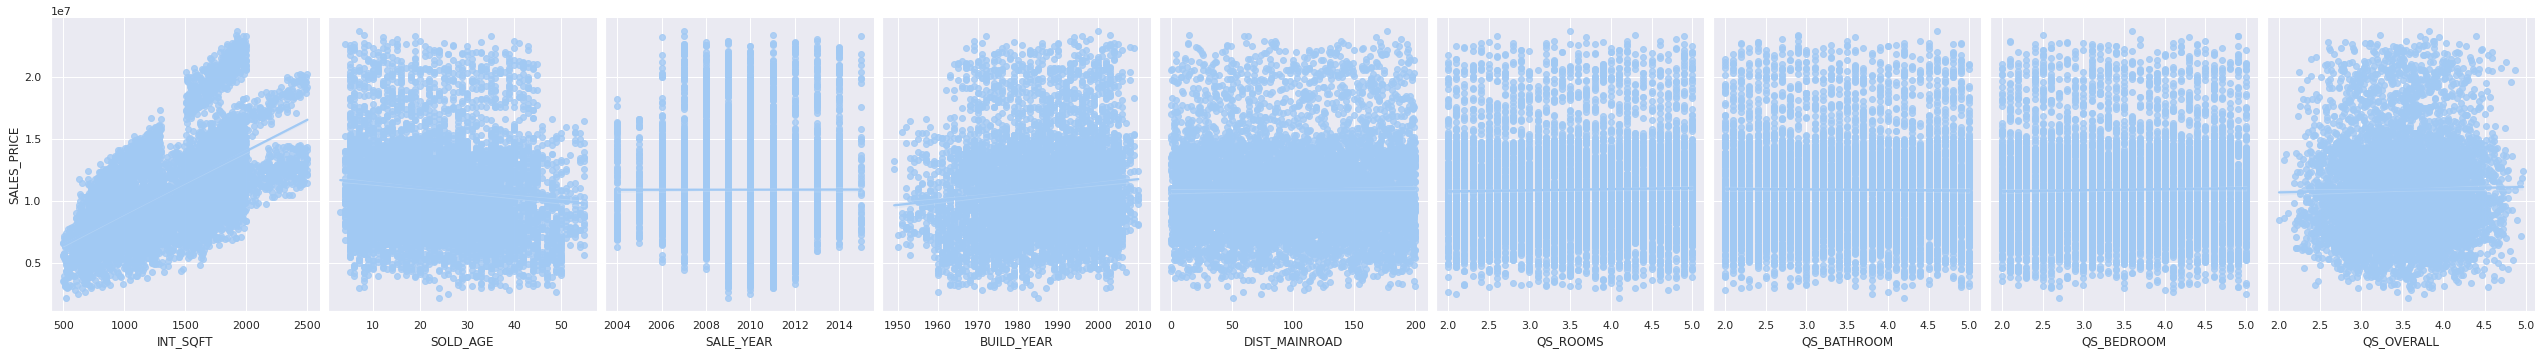

In [52]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR",'DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

In above graph,we  have checked whether there is a linear relationship of different features with target_variable('SALES_PRICE').

We can observe that only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE'), others are flatten.

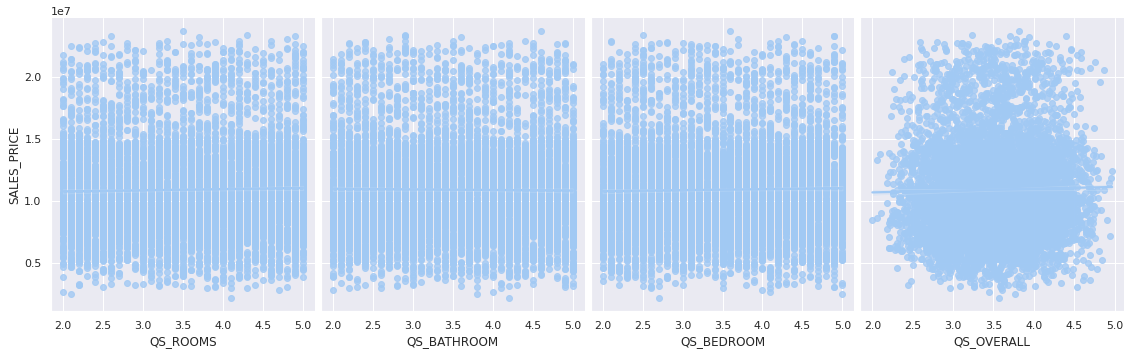

In [53]:

sns.pairplot(df,x_vars=['QS_ROOMS', "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

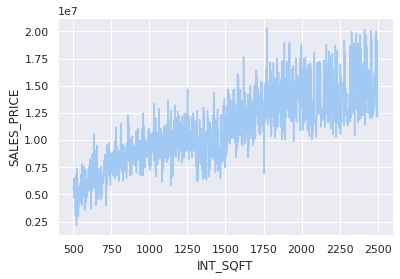

             INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612125
SALES_PRICE  0.612125     1.000000


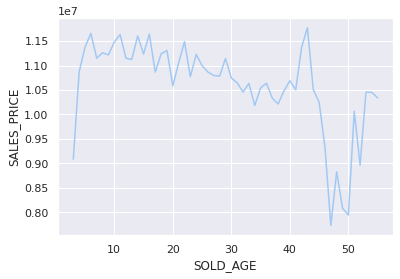

             SOLD_AGE  SALES_PRICE
SOLD_AGE     1.000000    -0.118842
SALES_PRICE -0.118842     1.000000


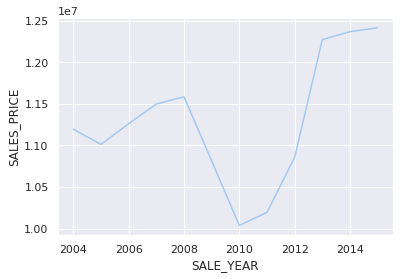

             SALE_YEAR  SALES_PRICE
SALE_YEAR     1.000000     0.000906
SALES_PRICE   0.000906     1.000000


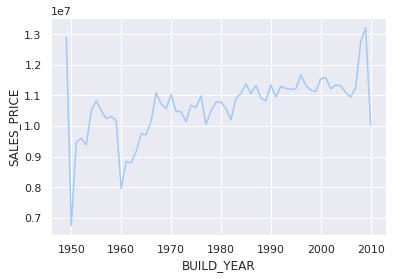

             BUILD_YEAR  SALES_PRICE
BUILD_YEAR     1.000000     0.116043
SALES_PRICE    0.116043     1.000000


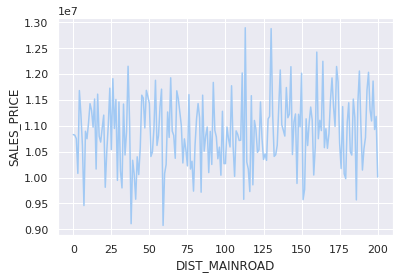

               DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018783
SALES_PRICE         0.018783     1.000000


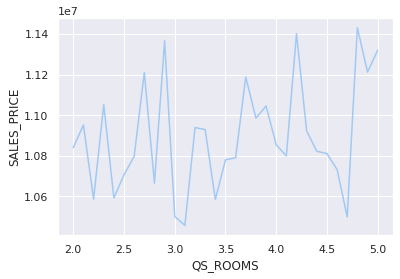

             QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.021967
SALES_PRICE  0.021967     1.000000


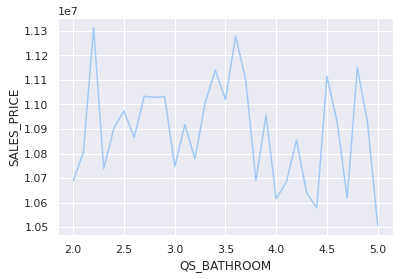

             QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.011377
SALES_PRICE    -0.011377     1.000000


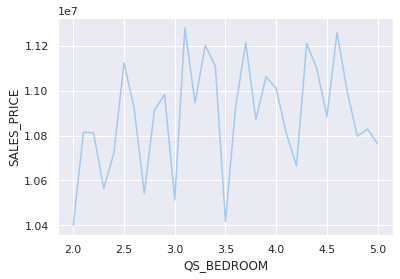

             QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.018804
SALES_PRICE    0.018804     1.000000


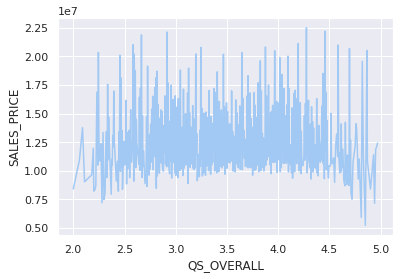

             QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020485
SALES_PRICE    0.020485     1.000000


In [54]:
for i in ('INT_SQFT',"SOLD_AGE","SALE_YEAR","BUILD_YEAR",'DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'):
# df.groupby("INT_SQFT")['SALES_PRICE'].mean().plot()
# plt.title('INT_SQFT vs SALES_PRICE')
# plt.xlabel('INT_SQFT')
# plt.ylabel('SALES_PRICE')
# plt.show()
  df.groupby(df[i])['SALES_PRICE'].mean().plot()
  # plt.title(i ,'vs SALES_PRICE')
  plt.xlabel(i)
  plt.ylabel('SALES_PRICE')
  plt.show()
  print(df[[i,'SALES_PRICE']].corr())

1) There is a linear relationship between INT_SQFT and SALES_PRICE .As INT_SQFT increases, SALES_PRICE increases ,therefore No transformation required

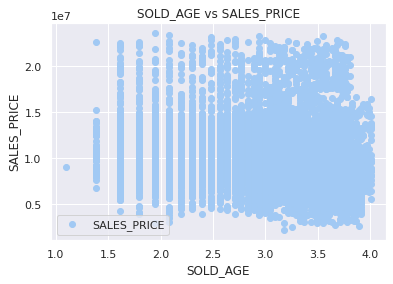

,transformed,SALES_PRICE
transformed,1.000000,-0.103007
SALES_PRICE,-0.103007,1.000000


In [55]:
df['transformed'] = np.log(df['SOLD_AGE'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.title('SOLD_AGE vs SALES_PRICE')
plt.xlabel('SOLD_AGE')
plt.ylabel('SALES_PRICE')
plt.show()
df[['transformed','SALES_PRICE']].corr()

1) There is no linear relationship between Sold_age and sales_price

2) Have tried all trasnformations - still not able to see a good linear relationship

3) Low correlation doesn't mean there is absence of any relation.

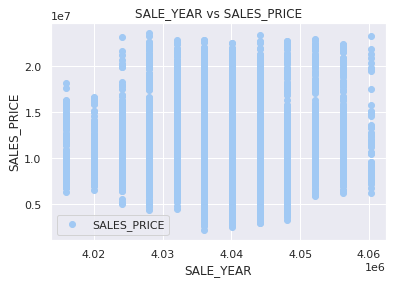

,transformed,SALES_PRICE
transformed,1.000000,0.000999
SALES_PRICE,0.000999,1.000000


In [56]:
df['transformed'] = np.square(df['SALE_YEAR'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.title('SALE_YEAR vs SALES_PRICE')
plt.xlabel('SALE_YEAR')
plt.ylabel('SALES_PRICE')
plt.show()
df[['transformed','SALES_PRICE']].corr()

1) There is no linear relationship between Sale_year and sales_price

2) Have tried all trasnformations - still not able to see a good linear relationship

3) Have decided to drop the feature

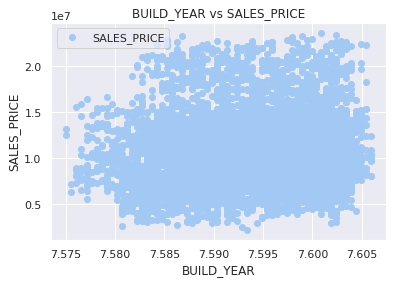

,transformed,SALES_PRICE
transformed,1.000000,0.116135
SALES_PRICE,0.116135,1.000000


In [57]:
df['transformed'] = np.log(df['BUILD_YEAR'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.title('BUILD_YEAR vs SALES_PRICE')
plt.xlabel('BUILD_YEAR')
plt.ylabel('SALES_PRICE')
plt.show()
df[['transformed','SALES_PRICE']].corr()

1) There is no linear relationship between build_year and sales_price

2) Have tried all trasnformations - still not able to see a good linear relationship

3) Have decided to drop the feature

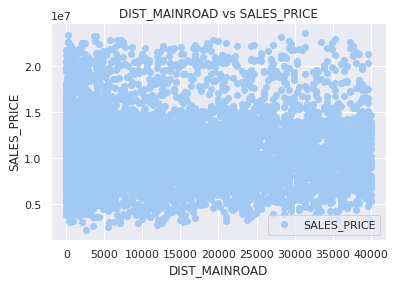

,transformed,SALES_PRICE
transformed,1.000000,0.021878
SALES_PRICE,0.021878,1.000000


In [58]:
df['transformed'] = np.square(df['DIST_MAINROAD'])
df.plot(x='transformed', y='SALES_PRICE', style='o')
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.show()
df[['transformed','SALES_PRICE']].corr()

1) There is no linear relationship between DIST_MAINROAD and sales_price

2) Have tried all trasnformations - still not able to see a good linear relationship

3) Have decided to drop the feature

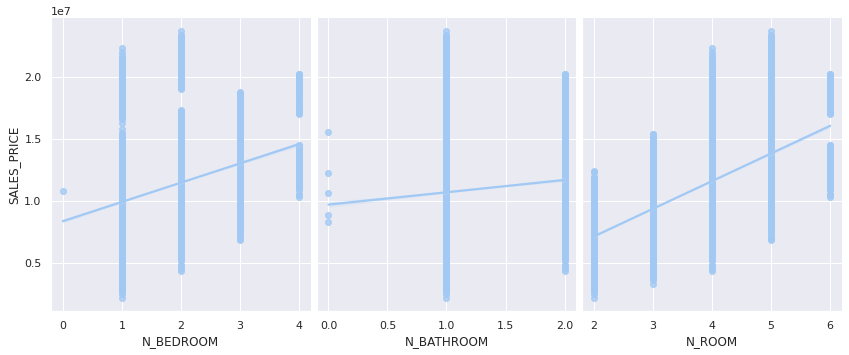

In [59]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()


In above graph, we have checked other few features has a linear relationship with target_variable('SALES_PRICE'). ["N_ROOMS","N_BATHROOM","N_BEDROOM"] has linear relationship with the target_variable(SALES_PRICE).


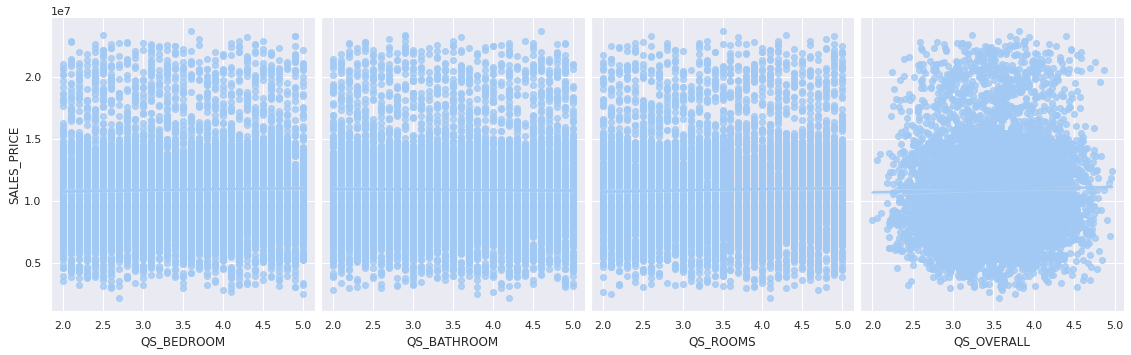

In [60]:
sns.pairplot(df,x_vars=["QS_BEDROOM", "QS_BATHROOM","QS_ROOMS","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()


In above graph, we have checked whether other few features has a linear relationship with target_variable('SALES_PRICE'). ["QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"]  have less relation with the target_variable(SALES_PRICE).

Moreover,dropping ['QS_ROOMS','QS_OVERALL','QS_BATHROOM','QS_BEDROOM'] because they are proprietary(masked) features. 


**Here we can come to conclusion that:** 

In qs_rooms,qs_bathroom,qs_overall,dist_mainroad,qs_bedroom we didn't find any relation, so this feature will be of no use or very less use for us, so we will drop it. 

In int_sqft,n_bedroom,n_room we find good relation, so this feature will be very important for us ,so we will keep it. 

In SOLD_age,n_bathroom, we find small relation so this feature will be useful for us so we will keep it. 


In [61]:
#----------------------------------------
#BUILDTYPE WISE MIN.AVG.MAX Sales_Prices:-
#----------------------------------------
buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Build_type_mmm = pd.concat([comm,house,others],axis=1)
Build_type_mmm = pd.DataFrame(Build_type_mmm.T)
Build_type_mmm["Build_type"]=["Commercial","House","Others"]

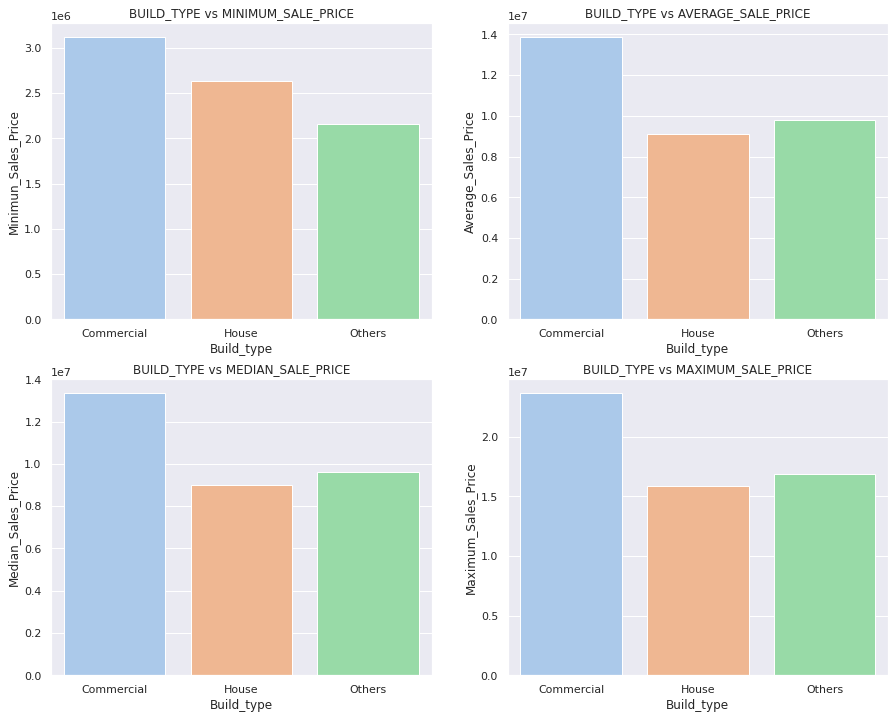

In [62]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

**Interpretation:**

COMMERCIAL - In all graphs, the Minimum,Average,Median and Maximum Price of commercial building is higher than "House" and "Others" building type.

House - Minimum price of "House" price is higher than "Others" building type, but Maximum,Average and Median Price lower than "Others" building type.

Others - Minimum price of "Others" price is lower than "House" building type, but Maximum,Average and Median Price higher than "House" building type.


In [63]:
#----------------------------
#AREA WISE MIN.AVG.MAX Sales_Prices:-
#----------------------------
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]


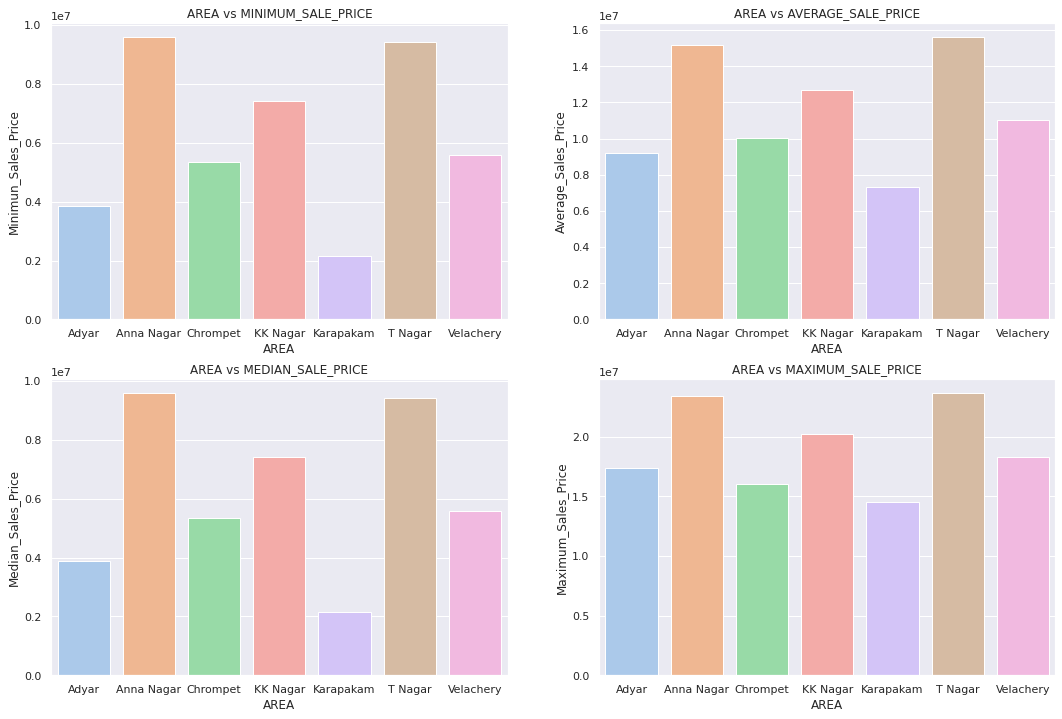

In [64]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [65]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']


In [66]:
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

In [67]:
mmm_df

Minimum       Average      Median   Maximum  \
BUILDTYPE  AREA                                                       
Commercial Adyar        6036800  1.151977e+07  11238050.0  17360470   
           Anna Nagar  15754040  1.994195e+07  20023775.0  23407860   
           Chrompet     8071050  1.238855e+07  12456450.0  16026600   
           KK Nagar    11286720  1.596759e+07  16197310.0  20246360   
           Karapakkam   3120000  9.166997e+06   9345250.0  14486250   
           T Nagar     16300260  2.011892e+07  20380405.0  23667340   
           Velachery   10391900  1.426175e+07  14239220.0  18298710   
House      Adyar        3869180  7.973683e+06   7960405.0  11409485   
           Anna Nagar   9593040  1.240600e+07  12354835.0  15237150   
           Chrompet     5340900  8.553965e+06   8548150.0  11845200   
           KK Nagar     7410200  1.066675e+07  10651630.0  14276060   
           Karapakkam   2640250  6.266440e+06   6285500.0   9966750   
           T Nagar      9433610  1.266454e+07  12683140.0  15880930   
           Velachery    5574400  9.036630e+06   8998725.0  12247960   
Others     Adyar        4456285  8.209260e+06   8181057.5  11818860   
           Anna Nagar  10245090  1.347352e+07  13396430.0  16859010   
           Chrompet     5925790  9.154363e+06   9171700.0  12851040   
           KK Nagar     7826780  1.163470e+07  11633740.0  14521700   
           Karapakkam   2156875  6.737757e+06   6678875.0  11117625   
           T Nagar     10573780  1.357577e+07  13765430.0  16766120   
           Velachery    6074780  9.726395e+06   9682115.0  12669880   

                        BUILDTYPE        AREA  
BUILDTYPE  AREA                                
Commercial Adyar       Commercial       Adyar  
           Anna Nagar  Commercial  Anna Nagar  
           Chrompet    Commercial    Chrompet  
           KK Nagar    Commercial    KK Nagar  
           Karapakkam  Commercial   Karapakam  
           T Nagar     Commercial     T Nagar  
           Velachery   Commercial   Velachery  
House      Adyar            House       Adyar  
           Anna Nagar       House  Anna Nagar  
           Chrompet         House    Chrompet  
           KK Nagar         House    KK Nagar  
           Karapakkam       House   Karapakam  
           T Nagar          House     T Nagar  
           Velachery        House   Velachery  
Others     Adyar           Others       Adyar  
           Anna Nagar      Others  Anna Nagar  
           Chrompet        Others    Chrompet  
           KK Nagar        Others    KK Nagar  
           Karapakkam      Others   Karapakam  
           T Nagar         Others     T Nagar  
           Velachery       Others   Velachery

**Interpretation:**

RESPECTIVE WITH MINIMUM PRICE OF EACH AREA.

COMMERCIAL - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".

HOUSE - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

OTHERS - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".


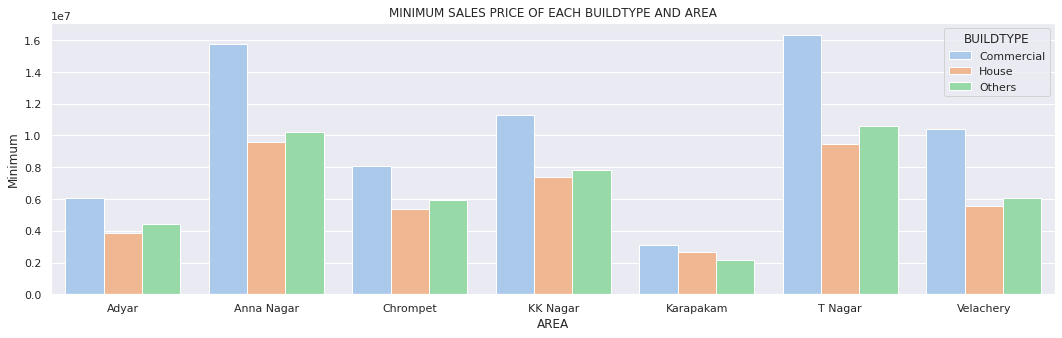

In [68]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

**Interpretation:**

RESPECTIVE WITH AVERAGE PRICE OF EACH AREA.

COMMERCIAL - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".

HOUSE - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

OTHERS - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".


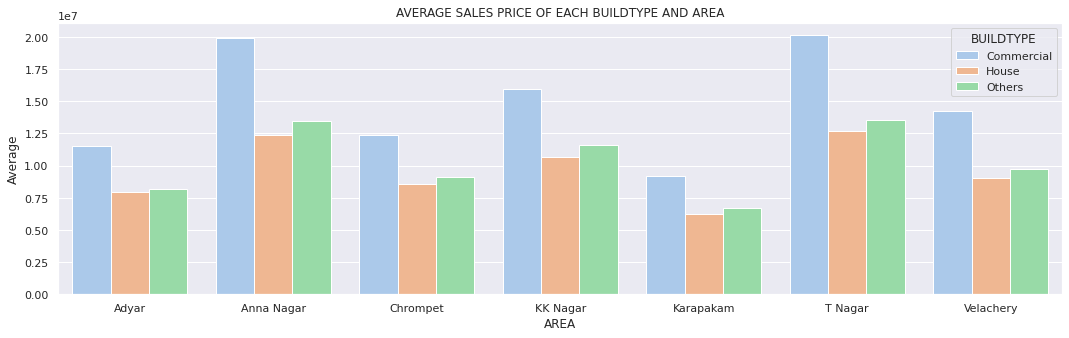

In [69]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

**Interpretation:**

RESPECTIVE WITH MAXIMUM PRICE OF EACH AREA.

COMMERCIAL - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Chrompet","Adyar","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".

HOUSE - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

OTHERS - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".


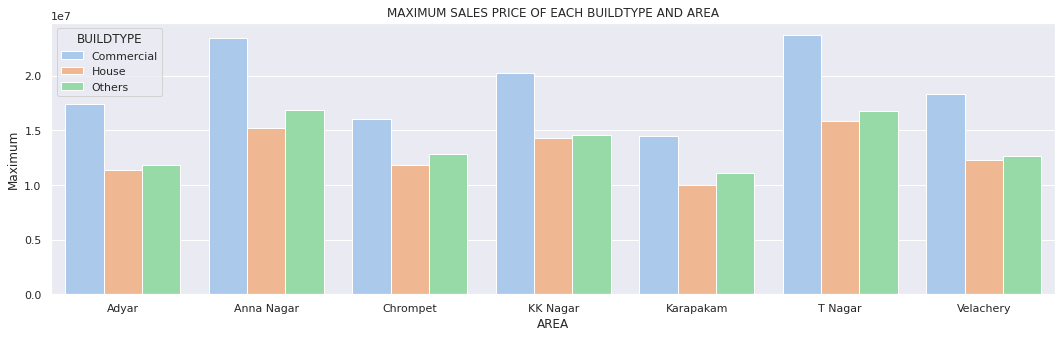

In [70]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

**ENCODING THE CATEGORICAL FEATURES.**





In [71]:
df.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,SOLD_AGE,transformed
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,...,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44,17161
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,...,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11,676


In [72]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'SALE_YEAR', 'BUILD_YEAR', 'SOLD_AGE',
       'transformed'],
      dtype='object')

In [73]:
df.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','SALE_COND','transformed','DIST_MAINROAD','SALE_YEAR','BUILD_YEAR','transformed'],axis=1,inplace=True)

**Label Encoding**

In [74]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':0,'No':1})
df['AREA']=df['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'ELO':0,'No Sewer':1,'AllPub':2})
df['STREET']=df['STREET'].map({'No Access':0,'Paved':1,'Gravel':2})
df['MZZONE']=df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [75]:
df['MZZONE']=df['MZZONE'].fillna(0).astype(int, errors='ignore')
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].fillna(0).astype(int, errors='ignore')
df['PARK_FACIL']=df['PARK_FACIL'].fillna(0).astype(int, errors='ignore')


**One Hot Encoding**

Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. We have just used get_dummies feature from pandas. 

In [76]:
one_hot_encoded_data=pd.get_dummies(df.BUILDTYPE)
one_hot_encoded_data

,Commercial,House,Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
7104,0,0,1
7105,0,0,1
7106,0,1,0
7107,1,0,0


In [77]:
final_data=pd.concat([df,one_hot_encoded_data],axis='columns')
final_data.drop(['BUILDTYPE'],axis=1,inplace=True)

In [78]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7109 non-null   int64
 1   INT_SQFT       7109 non-null   int64
 2   N_BEDROOM      7109 non-null   int64
 3   N_BATHROOM     7109 non-null   int64
 4   N_ROOM         7109 non-null   int64
 5   PARK_FACIL     7109 non-null   int64
 6   UTILITY_AVAIL  7109 non-null   int64
 7   STREET         7109 non-null   int64
 8   MZZONE         7109 non-null   int64
 9   SALES_PRICE    7109 non-null   int64
 10  SOLD_AGE       7109 non-null   int64
 11  Commercial     7109 non-null   uint8
 12  House          7109 non-null   uint8
 13  Others         7109 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 631.9 KB


CORRELATION WITH TARGET VARIABLE.

,SALES_PRICE
AREA,0.694149
INT_SQFT,0.612125
N_BEDROOM,0.330909
N_BATHROOM,0.108414
N_ROOM,0.602760
PARK_FACIL,-0.146428
UTILITY_AVAIL,0.067147
STREET,0.149589
MZZONE,0.436594
SALES_PRICE,1.000000


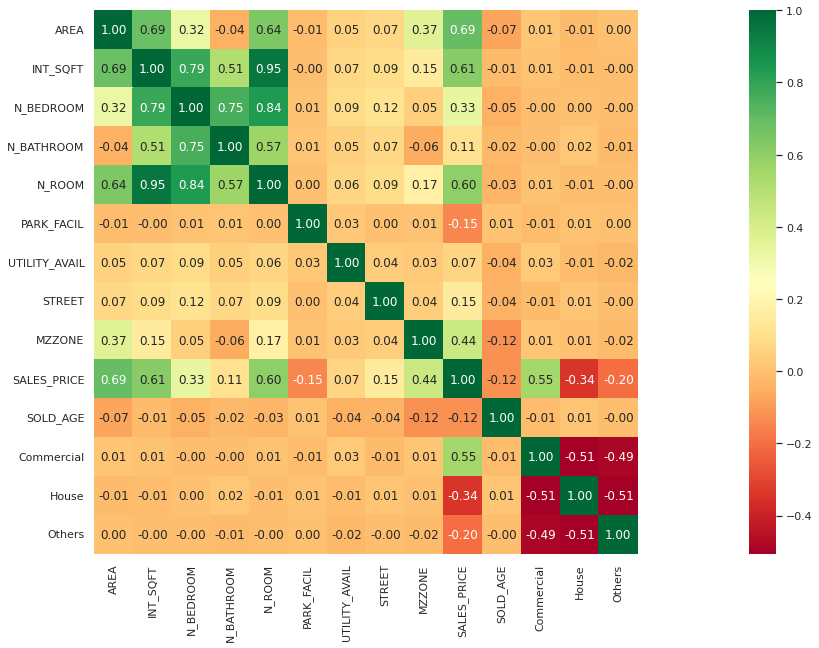

In [79]:
#correlation matrix
corrmat = final_data.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(final_data[final_data.columns[:]].corr()['SALES_PRICE'][:]).T
i=i.iloc[0]
pd.DataFrame(i)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [81]:
X=final_data.drop(['SALES_PRICE'],axis=1)
y=final_data['SALES_PRICE']



In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))

**MACHINE LEARNING MODEL:**

Will try all the regression models and use whichever will give the highest score in cross_validation/test data.

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

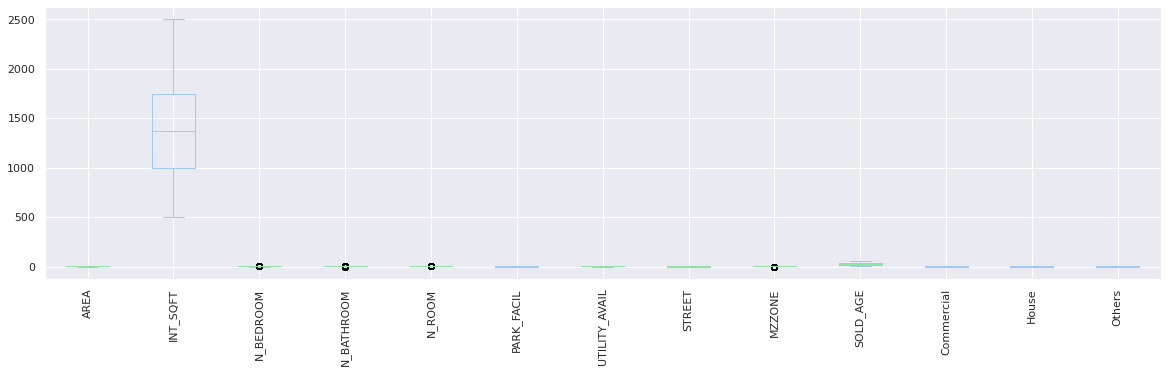

In [84]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90) 
plt.show()

**Interpretation:-** 

Here we can clearly see in our features column int_sqft is the only feature which contains very large value and all the remaining of the feature column are pretty small. 

In [85]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

WITH CROSS VALIDATION.

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [88]:
# CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()
CV_Linear_regression = cross_val_score(lr_model,X_train_scaled,y_train,cv=10).mean()

print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.9166871238642198


In [89]:
CV_XG_Boost = cross_val_score(xg_model,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[11:55:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [90]:
CV_RandomForest = cross_val_score(rf,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Random forest model is:",CV_RandomForest)

The cross_validation score of an Random forest model is: 0.8705545667918742


In [91]:
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)

The cross_validation score of an Linear_Regression model is: 0.9166871238642198
The cross_validation score of an XG_Boost model is: 0.995757503739461
The cross_validation score of an Random_Forest model is: 0.8705545667918742


**R_SQUARED_SCORES.**

The cross_validation score of an Linear_Regression model is: 0.9166871238642198

The cross_validation score of an XG_Boost model is: 0.995757503739461

The cross_validation score of an Random_Forest model is: 0.8705545667918742

WITHOUT CROSS_VALIDATION.



**FIRST MODEL - LINEAR REGRESSION**

In [92]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [93]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred=lr_model.predict(X_test)

In [95]:
print(r2_score(y_test,y_pred))

0.9244453998532478


**SECOND MODEL - XGBOOST**

In [96]:
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )

In [97]:
import xgboost as xg
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xg.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.38380979672075655  Cross-Val score :  -0.3896055493378978
Learning rate :  0.02  Train score :  0.7458302541819979  Cross-Val score :  0.7428826783135394
Learning rate :  0.03  Train score :  0.9243280822539433  Cross-Val score :  0.9218012936679528
Learning rate :  0.04  Train score :  0.9618213011013517  Cross-Val score :  0.9594580178272576
Learning rate :  0.05  Train score :  0.973551512322802  Cross-Val score :  0.9716821953701535
Learning rate :  0.06  Train score :  0.9796590641666479  Cross-Val score :  0.9774743267135921
Learning rate :  0.07  Train score :  0.9839875005682575  Cross-Val score :  0.9817529525363712
Learning rate :  0.08  Train score :  0.9866734763304721  Cross-Val score :  0.9847566604869632
Learning rate :  0.09  Train score :  0.9887981717844614  Cross-Val score :  0.9870066897900974
Learning rate :  0.1  Train score :  0.9900840972284215  Cross-Val score :  0.9884386535670313
Learning rate :  0.11  Train score :  0

In [98]:
model = xg.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

[12:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9944017691815878

In [99]:
xg_y_pred=model.predict(X_test)

In [100]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9944017691815878


**THIRD MODEL - RANDOM FOREST**

In [101]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)

In [102]:
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.8684711809231584


**FOURTH MODEL - ENSEMBLE TECHNIQUE**

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

In [104]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

# model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision_Tree',model4)])
model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3),('Decision tree',model4)])
model.fit(X_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9859431154923675


**R_SQUARED_SCORES**

The cross_validation score of an Linear_Regression model is :0.9244453998532478

The cross_validation score of an XG_Boost model is : 0.9944017691815878

The cross_validation score of an Random_Forest model is : 0.8684711809231584
The cross_validation score of an Ensemble_technic model is :0.9859431154923675



**BEST MODEL:**

 XGBoost model gave the highest accuracy which is close to 1, followed by Ensemble Technique, Linear Regression and Random Forest Regressor.

In [105]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))
print("Ensemble Technique Rsquared metric:",r2_score(y_test,et_y_pred))
print("Linear Regg model Rsquared metric:",r2_score(y_test,y_pred))
print("Random forest Regressor model Rsquared metric:",r2_score(y_test,rf_pred))


XGBoost model Rsquared metric: 0.9944017691815878
Ensemble Technique Rsquared metric: 0.9859431154923675
Linear Regg model Rsquared metric: 0.9244453998532478
Random forest Regressor model Rsquared metric: 0.8684711809231584
